# Interlocking analysis for Assemblies of possibly non convex Polyhedra

In [7]:
include("../Polyhedron.jl")
include("../examples.jl")
include("../decomposition.jl")

convexDecomposition


subPoly:Polyhedron(

[[0.539345, 0.0, 1.41202], [-0.539345, 0.0, 1.41202], [0.0, 1.41202, 0.539345], [0.872678, 0.872678, 0.872678], [-0.872678, 0.872678, 0.872678], [0.0, -1.41202, 0.539345], [0.872678, -0.872678, 0.872678], 

[-0.872678, -0.872678, 0.872678], [0.539345, 0.0, -1.41202], [-0.539345, 0.0, -1.41202], [0.0, 1.41202, -0.539345], [0.872678, 0.872678, -0.872678], [-0.872678, 0.872678, -0.872678

], [0.0, -1.41202, -0.539345], [0.872678, -0.872678, -0.872678], [-0.872678, -0.872678, -0.872678], [1.41202, 0.539345, 0.0], [-1.41202, 0.539345, 0.0], [1.41202, -0.539345, 0.0], [-1.41202, -0.539345, 0.0]]

, [[1, 2], [1, 4], [1, 7], [2, 5], [2, 8], [3, 4], [3, 5], [3, 11], [4, 17], [5, 18], [6, 7], [6, 8], [6, 14], [7, 19], [8, 20], [9, 10], [9, 12], [9, 15], [10, 13], [10, 16], [11, 12], [11, 13], [12, 17],

 [13, 18], [14, 15], [14, 16], [15, 19], [16, 20], [17, 19], [18, 20], [2, 4], [2, 3], [2, 7], [2, 6], [10, 12], [10, 11], [10, 15], 

[10, 14], [4, 11], [4, 12], [5, 11], [5, 13], [7, 14], [7, 15], [8, 14], [8, 16], [4, 7], [4, 19], [5, 8], [5, 20], [12, 15], [12, 19], [13, 16], [13, 20]], [[2, 1, 4], [2, 4, 3], [3, 5, 2], [2, 1, 7], [2, 7, 6

], [6, 8, 2], [10, 9, 12], [10, 12, 11], [11, 13, 10], [10, 9, 15], 

[10, 15, 14], [14, 16, 10], [4, 3, 11], [4, 11, 12], [12, 17, 4], [5, 3, 11], [5, 11, 13], [13, 18, 5], [7, 6, 14], [7, 14, 15], [15, 19, 7], 

[8, 6, 14], [8, 14, 16], [16, 20, 8], [4, 1, 7], [4, 7, 19], [19, 17, 4], [5, 2, 8], [5, 8, 20], [20, 18, 5], [12, 9, 15], [12, 15, 19], [19, 17, 12], [13, 10, 16], [13, 16, 20], [20, 18, 13]])


vertexDegrees.==3:

BitVector[[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]]


tetraverts:

[2, 4, 7, 1]
found tetra:Polyhedron([[-0.539345, 0.0, 1.41202], [0.872678, 0.872678, 0.872678], [0.872678, -0.872678, 0.872678], [0.539345, 0.0, 1.41202]], [[1, 2], [2, 

3], [3, 4], [4, 1]], [[1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]])



subPoly:Polyhedron([[-0.539345, 0.0, 1.41202], [0.0, 1.41202, 0.539345], [0.872678, 0.872678, 0.872678], [-0.872678, 0.872678, 0.872678], [0.0, -1.41202, 0.539345], [0.872678, -0.872678, 0.872678], [-0.872678, -0.872678, 0.872678], [0.539345, 0.0, -1.41202], [-0.539345, 0.0, -1.41202], [0.0, 1.41202, -0.539345], [0.872678, 0.872678, -0.872678], [-0.872678, 0.872678, -0.872678], [0.0, -1.41202, -0.539345], [0.872678, -0.872678, -0.872678], [-0.872678, -0.872678, -0.872678], [1.41202, 0.539345, 0.0], [-1.41202, 0.539345, 0.0], [1.41202, -0.539345, 0.0], [-1.41202, -0.539345, 0.0]], [[1, 4], [1, 7], [2, 3], [2, 4], [2, 10

], [3, 16], [4, 17], [5, 6], [5, 7], [5, 13], [6, 18], [7, 19], [8, 9], [8, 11], [8, 14], [9, 12], [9, 15], [10, 11], [10, 12], [11, 16], [12, 17], [13, 14], [13, 15], [14, 18], [15, 19], [16, 18], [17, 19], [1, 3], [1, 2], [1, 6], [1, 5], [9, 11], [9, 10], [9, 14], [9, 13], [3, 10], [3, 11], [4, 10], [4, 12], [6, 13], [6, 14], [7, 13], [7, 15], [3, 6], [3, 

18], [4, 7], [4, 19], [11, 14], [11, 18], [12, 15], [12, 19]], [[1, 3, 2], [2, 4, 1], [1, 6, 5], [5, 7, 1], [9, 8, 11

], [9, 11, 10], [10, 12, 9], [9, 8, 14], [9, 14, 13], [13, 15, 9], [3, 2, 10], [3, 10, 11], [11, 16, 3]

, [4, 2, 10], [4, 10, 12], [12, 17, 4], [6, 5, 13], [6, 13, 14], [14, 18, 6], [7, 5, 13], [7, 13, 15], [15, 19, 7], [3, 6, 18], [18, 16, 3], [4, 1, 7], [4,

 7, 19], [19, 17, 4], [11, 8, 14], [11, 14, 18], [18, 16, 11], [12, 9, 15], [12, 15, 19], [19, 17, 12], [1, 3, 6]])
vertexDegrees.==3:BitVector[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]]


tetraverts:[9, 11, 14, 8]
found tetra:Polyhedron([[-0.539345, 0.0, -1.41202], [0.872678, 0.872678, -0.872678], [0.872678, -0.872678, -0.872678], [0.539345, 0.0, -1.41202]], [[1, 2], 

[2, 3], [3, 4], [4, 1]], [[1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]])

subPoly:Polyhedron([[-0.539345, 0.0, 1.41202], [0.0,

 1.41202, 0.539345], [0.872678, 0.872678, 0.872678], [-0.872678, 0.872678, 0.872678], [0.0, -1.41202, 0.539345], [0.872678, -0.872678, 0.872678], [-0.872678, -0.872678, 0.872678], [-0.539345, 0.0, -1.41202]

, [0.0, 1.41202, -0.539345], [0.872678, 0.872678, -0.872678], [-0.872678, 0.872678, -0.872678], [0.0, -1.41202, -0.539345], [0.872678, -0.872678, -0.872678], [-0.872678, -0.872678, -0.872678], [1.41202, 0.539345, 0.0], [-1.41202, 0.539345, 0.0], [1.41202, -0.539345, 0.0], [-1.41202, -0.539345, 0.0]], [[1, 4], [1, 7], [2, 3], [2, 4], [2, 9], [3, 15], [4, 16], [5, 6], [5, 7], [5, 12], [6

, 17], [7, 18], [8, 11], [8, 14], [9, 10], [9, 11], [10, 15], [11, 16], [12, 13], [12

, 14], [13, 17], [14, 18], [15, 17], [16, 18], [1, 3], [1, 2], [1, 6], [1, 5], [8, 10], [8, 9], [8, 13], [8, 12], [3, 9], [3, 10], [4, 9], [4, 11], [6, 12], [6, 13], [7, 12], [7, 14], [3, 6], [3, 17], [4, 7], [4, 18], 

[10, 13], [10, 17], [11, 14], [11, 18]], [[1, 3, 2], [2, 4, 1], [1, 6, 5], [5, 7, 1], [8, 10, 9], [9, 11, 8], [8, 13, 12], [12, 14, 8], [3, 2, 9], [3, 9, 10], [10, 15, 3], [4, 2, 9], [4, 9, 11], [11, 16, 4], [6, 5, 12], [6, 12, 13], [13, 17, 6], [7, 5, 12], [7, 12, 14], [14, 18, 7], [3, 6, 17], [17, 15, 3], [4, 1, 7]

, [4, 7, 18], [18, 16, 4], [10, 13, 17], [17, 15, 10], [11, 8, 14], [11, 14, 18], [18, 16, 11], [1, 3, 6], [8, 10, 13]])
vertexDegrees.==3:BitVector[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

 1, 1, 0, 0]]
tetraverts:[3, 10, 17, 15]
found tetra:Polyhedron([

[0.872678, 0.872678, 0.872678], [0.872678, 0.872678, -0.872678], [1.41202, -0.539345, 0.0], [1.41202, 0.539345, 0.0]], 

[[1, 2], [2, 3], [3, 4], [4, 1]], [[1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]])


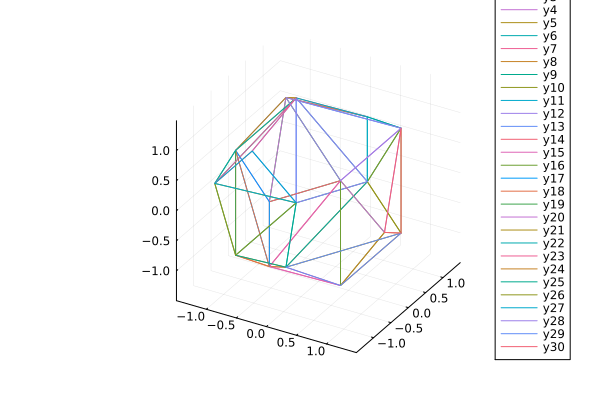

In [8]:
using Plots
include("../plotting.jl")

poly = convexDecomposition(Dodecahedron)[end]

plotPolyhedron(poly)

In [6]:
Dodecahedron.verts[[3,11,12,7,4]]

5-element Vector{Vector{Float64}}:
 [0.0, 1.41202, 0.539345]
 [0.0, 1.41202, -0.539345]
 [0.872678, 0.872678, -0.872678]
 [0.872678, -0.872678, 0.872678]
 [0.872678, 0.872678, 0.872678]

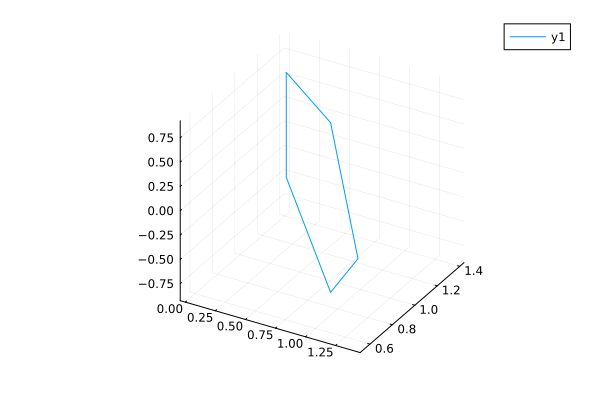

In [9]:
poly = Polyhedron(Dodecahedron.verts[[3,11,12,17,4]], [[1,2], [2,3], [3,4], [4, 5], [5,1]], [[1,2,3,4,5]])
plotPolyhedron(poly)

In [2]:
triangulatePolyhedron(Dodecahedron)

current facet:

[1, 4, 3, 5, 2]
current subfacet:[1, 4, 3, 5, 2]


current subfacet:[4, 3, 5, 2]
current subfacet:[3, 5, 2]
current facet:[1, 7, 6, 8, 2]
current subfacet:[1, 7, 6, 8, 2]
current subfacet:[7, 6, 8, 2]
current subfacet:[6, 8, 2]
current facet:[9, 12, 11, 13, 10]
current subfacet:[9, 12, 11, 13, 10]
current subfacet:[12, 11, 13, 10]
current subfacet:[

11, 13, 10]
current facet:[9, 15, 14, 16, 10]
current subfacet:[9

## Experimente

In [17]:
using GeometryBasics, GLMakie

X = [0. 1 1 2; 1 1 2 2; 0 0 1 1]
Y = [1. 1 1 1; 1 0 1 0; 0 0 0 0]
Z = [1. 1 1 1; 1 0 1 0; 0 0 0 0]
C = [.5 1. 1. .5; 1. .5 .5 .1667; .333 .333 .5 .5]

xyz = reshape([X[:] Y[:] Z[:]]', :)
fap = poly(connect(xyz, Point{3}), connect(1:length(X), TriangleFace); strokewidth=1)

display(fap)

GLMakie.Screen(...)

In [19]:
connect(xyz, Point{3})

12-element reinterpret(Point3{Float64}, ::TupleView{Tuple{Float64, Float64, Float64}, 3, 3, Base.ReshapedArray{Float64, 1, LinearAlgebra.Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}}):
 [0.0, 1.0, 1.0]
 [1.0, 1.0, 1.0]
 [0.0, 0.0, 0.0]
 [1.0, 1.0, 1.0]
 [1.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [1.0, 1.0, 1.0]
 [2.0, 1.0, 1.0]
 [1.0, 0.0, 0.0]
 [2.0, 1.0, 1.0]
 [2.0, 0.0, 0.0]
 [1.0, 0.0, 0.0]

In [23]:
using PolygonOps

In [26]:
inpolygon([1,0,0], [[1,0,0], [0,1,0], [0,0,1], [1,0,0]])

-1

In [31]:
a = [1,2,3]
a[a.>2]

1-element Vector{Int64}:
 3

In [2]:
using Makie.GeometryBasics


f = Figure()
Axis(f[1, 1])

poly!(Point2f[(0, 0), (2, 0), (3, 1), (1, 1)], color = :red, strokecolor = :black, strokewidth = 1)

f

UndefVarError: UndefVarError: Figure not defined

In [6]:
using Makie.GeometryBasics, GLMakie

X = [0. 1 1 2; 1 1 2 2; 0 0 1 1]
Y = [1. 1 1 1; 1 0 1 0; 0 0 0 0]
Z = [1. 1 1 1; 1 0 1 0; 0 0 0 0]
C = [.5 1. 1. .5; 1. .5 .5 .1667; .333 .333 .5 .5]

fap = Figure()

xyz = reshape([X[:] Y[:] Z[:]]', :)
poly!(fap, connect(xyz, Point{3}), connect(1:length(X), TriangleFace); color=C[:], strokewidth=1)

display(fap)

ErrorException: There is no current axis to plot into.

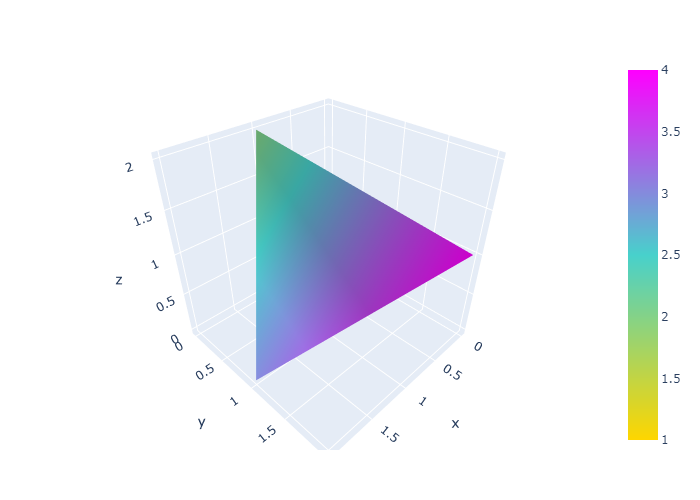

In [7]:
using PlotlyJS

p = Plot()

plot(mesh3d(
    x=[0, 1, 2, 0],
    y=[0, 0, 1, 2],
    z=[0, 2, 0, 1],
    #colorbar_title="z",
    colorscale=[[0, "gold"],
                [0.5, "mediumturquoise"],
                [1, "magenta"]],
    # Intensity of each vertex, which will be interpolated and color-coded
    intensity=[0, 0,0,0],
    # i, j and k give the vertices of triangles
    # here we represent the 4 triangles of the tetrahedron surface
    i=[0, 0, 0, 1],
    j=[1, 2, 3, 2],
    k=[2, 3, 1, 3],
    name="y",
    showscale=true
))

plot(mesh3d(
    x=[0, 1, 2, 0],
    y=[0, 0, 1, 2],
    z=[0, 2, 0, 1],
    #colorbar_title="z",
    colorscale=[[0, "gold"],
                [0.5, "mediumturquoise"],
                [1, "magenta"]],
    # Intensity of each vertex, which will be interpolated and color-coded
    intensity=1:4,
    # i, j and k give the vertices of triangles
    # here we represent the 4 triangles of the tetrahedron surface
    i=[0, 0, 0, 1],
    j=[1, 2, 3, 2],
    k=[2, 3, 1, 3],
    name="y",
    showscale=true
))
